# 1. Prepare data for analysis

In [29]:
import pandas as pd

In [38]:
# Importing necessary columns
power_cols = ["Datetime", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]

# Create a total consumption column of all 3 power zones and read in all other columns
powerconsumption = pd.read_csv(
    "powerconsumption.csv",
    usecols=power_cols,
    parse_dates=["Datetime"]
).assign(total_consumption = lambda x: x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"],
         hour = lambda x: x["Datetime"].dt.hour,
         day_of_week = lambda x: x["Datetime"].dt.dayofweek

)

In [39]:
# saved 3.4 MB from conversion of object to datetime
powerconsumption.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
 4   total_consumption       52416 non-null  float64       
 5   hour                    52416 non-null  int32         
 6   day_of_week             52416 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 2.4 MB


In [86]:
# Want to create a column with names of the day of the week for intuitiveness
# Need to create a list in order to correctly identify how we want the days to show (not alphabetical)

day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

# Create column with the day name
powerconsumption["day_name"] = pd.Categorical(powerconsumption["Datetime"].dt.day_name(), categories=day_of_week)

In [87]:
powerconsumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week,day_name
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6,Sunday
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6,Sunday
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6,Sunday
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6,Sunday
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6,Sunday


# 2. Visualize consumption over time

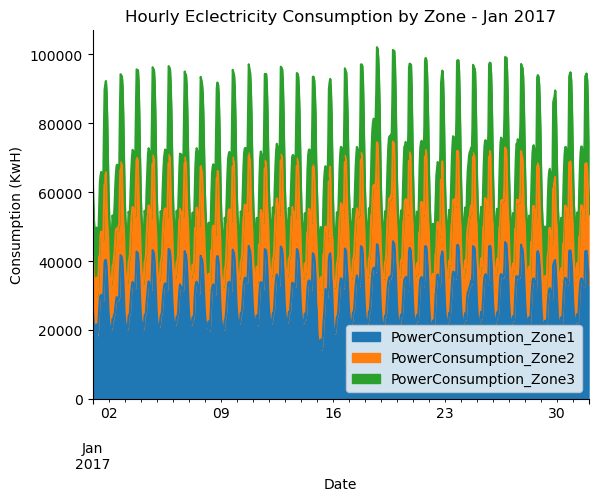

In [69]:
import seaborn as sns

# Set Datetime as index to push into index and resample by hour
# We can also set per day to have a daily look at energy consumption
(powerconsumption
 .set_index(["Datetime"])
 .resample("H")
 .mean()
 .loc["2017-01", ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]]
 .plot
 .area(
     title="Hourly Eclectricity Consumption by Zone - Jan 2017",
     xlabel="Date",
     ylabel="Consumption (KwH)"
 )
)

sns.despine()

# We would need to inform the committe that we need to be able to at least handle 100,000 KwH

# 3. Visualize consumption seasonality

In [88]:
# Create a pivot table for the data looking at the hourly consumption per day of week
(powerconsumption.pivot_table(
    index="day_name",
    columns="hour",
    values="total_consumption",
    aggfunc="mean")
)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
Tuesday,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
Wednesday,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
Thursday,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
Friday,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
Saturday,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
Sunday,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676


''

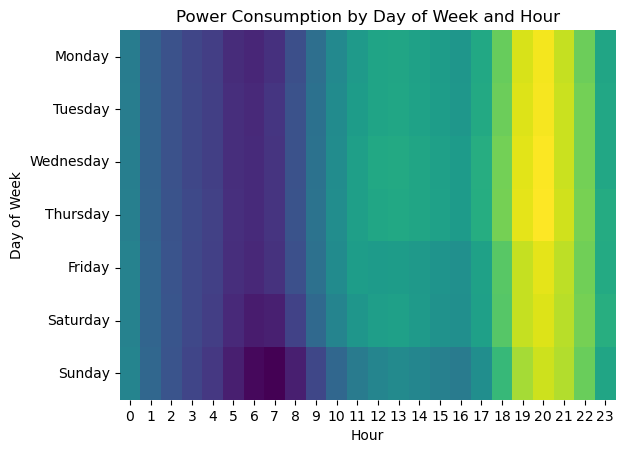

In [89]:
# Use the pivot table and visualize by creating a heatmap
sns.heatmap(
    powerconsumption.pivot_table(
        index="day_name",
        columns="hour",
        values="total_consumption",
        aggfunc="mean"
    ),
    cbar=None,
    cmap="viridis"
).set(title="Power Consumption by Day of Week and Hour",
     ylabel="Day of Week",
     xlabel="Hour")
;

# We see that energy consumption is heavy in the early day but less later in the day
# Most days of the sweek tend to be similar but it looks like there is some different patterns for the weekend